In [1]:
import geoai

In [2]:
raster_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_rgb_train.tif"
vector_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_buildings_masks.geojson"


In [5]:

raster_path = geoai.download_file(raster_url, "./data/naip_rgb_train.tif")
vector_path = geoai.download_file(vector_url, "./data/naip_buildings_masks.geojson")


naip_rgb_train.tif: 100%|██████████| 8.88M/8.88M [00:00<00:00, 13.6MB/s]
naip_buildings_masks.geojson: 770kB [00:00, 20.0MB/s]


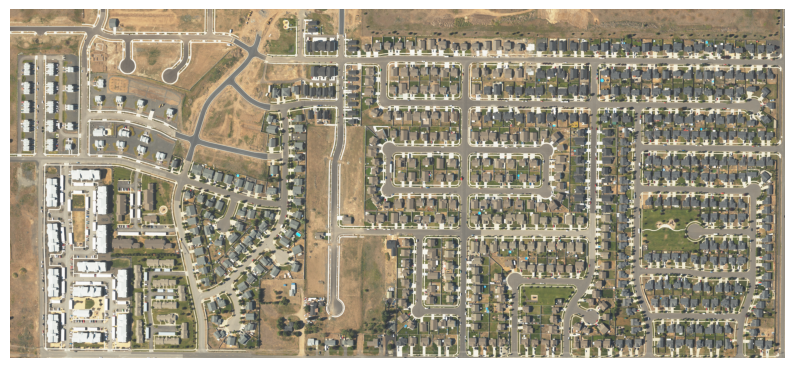

In [6]:
geoai.view_image(raster_path)

<Axes: >

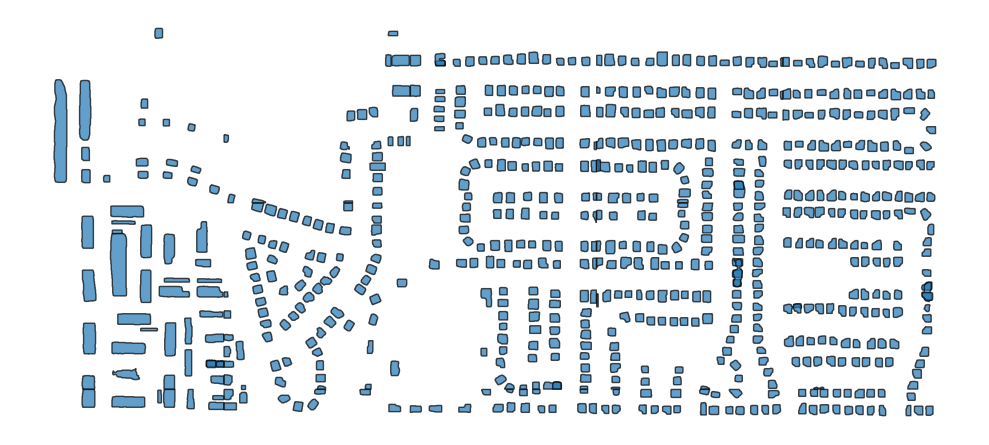

In [8]:
geoai.view_vector(vector_path)

In [10]:
geoai.view_vector_interactive(vector_path)

In [13]:
output_path=vector_path.replace(".geojson", ".tif")
geoai.vector_to_raster(vector_path, output_path, raster_path)

Rasterized data saved to ./data/naip_buildings_masks.tif


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

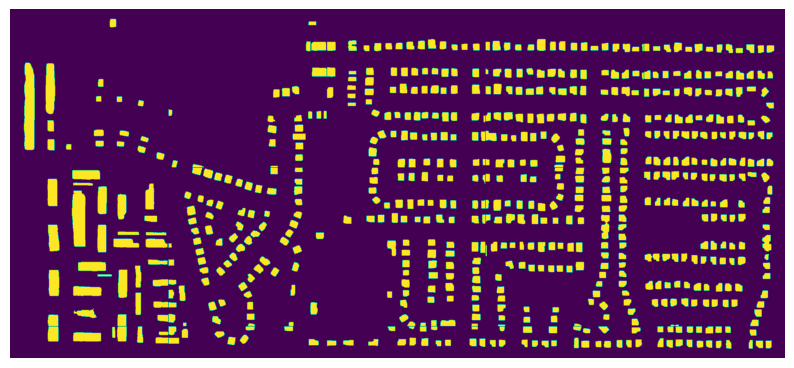

In [14]:
geoai.view_image(output_path)

In [15]:
tiles=geoai.export_geotiff_tiles(in_raster=raster_path,out_folder="./data/output",in_class_data=vector_path,tile_size=512,stride=256,buffer_radius=0,create_overview=True)


Raster info for ./data/naip_rgb_train.tif:
  CRS: EPSG:26911
  Dimensions: 2503 x 1126
  Resolution: (0.6000000000000046, 0.6)
  Bands: 3
  Bounds: BoundingBox(left=454780.8, bottom=5277567.0, right=456282.6, top=5278242.6)
Loaded 688 features from ./data/naip_buildings_masks.geojson
Vector CRS: EPSG:26911
Found 1 unique classes: [1]


Generated: 36, With features: 36: 100%|██████████| 36/36 [00:02<00:00, 12.62it/s]


Overview image saved to ./data/output/overview.png

------- Export Summary -------
Total tiles exported: 36
Tiles with features: 36 (100.0%)
Average feature pixels per tile: 38803.1
Output saved to: ./data/output

------- Georeference Verification -------


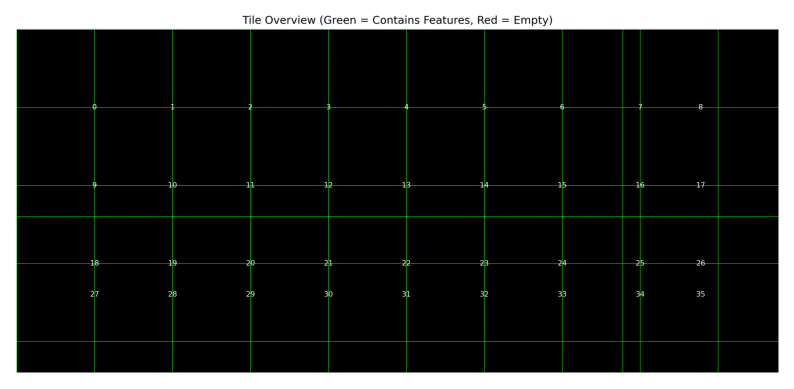

In [19]:
geoai.view_image("./data/output/overview.png")